# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import crosstab
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score 
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [6]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [7]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

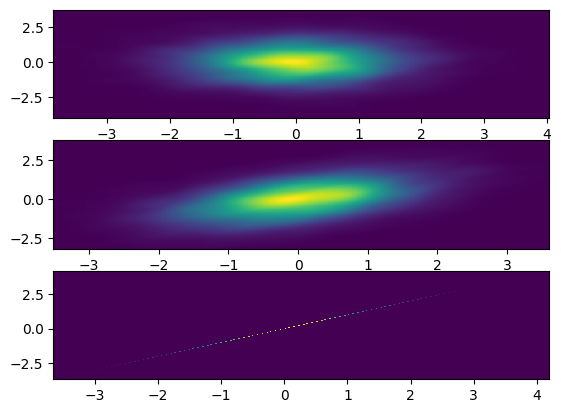

In [8]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [10]:
# pearsonr - Pearson correlation
# use sklearn.metrics.mutual_info_score although it is not the best option 
#       (as it takes max over permutations of classes of r.v. instead of computing one value and returning it)

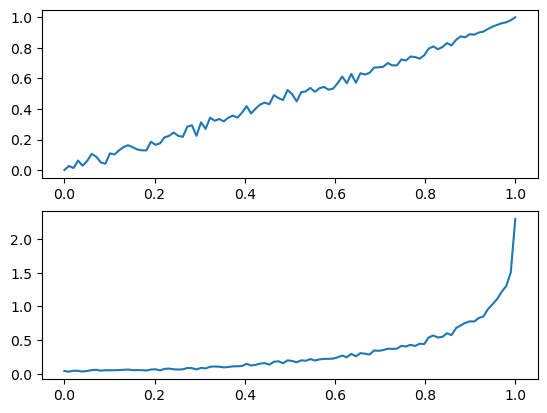

In [2]:
n = 1000
rho = np.linspace(0, 1, 100)

pearson = np.zeros(100)
mi = np.zeros(100)
for i in range(100):
    data_2d = np.random.multivariate_normal([0, 0], [[1, rho[i]], [rho[i], 1]], n)
    data_2d[:,0] = pd.qcut(data_2d[:,0], 10, labels=False)
    data_2d[:,1] = pd.qcut(data_2d[:,1], 10, labels=False)
    pearson[i] = pearsonr(data_2d[:,0], data_2d[:,1])[0]
    mi[i] = mutual_info_score(data_2d[:,0], data_2d[:,1])

fig, axs = plt.subplots(2)
axs[0].plot(rho, pearson)
axs[1].plot(rho, mi)
plt.show()

#### bp 3)

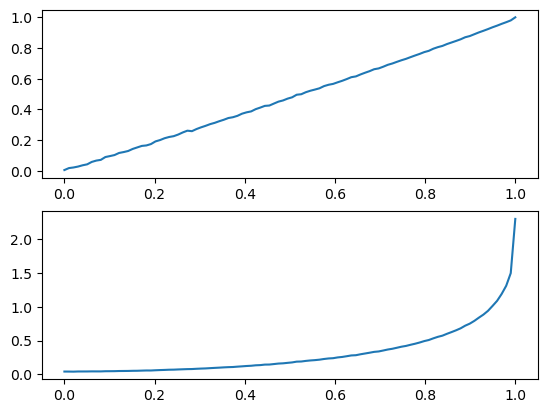

In [3]:
n = 1000
rho = np.linspace(0, 1, 100)
pearson = np.zeros((100, 100))
mi = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        data_2d = np.random.multivariate_normal([0, 0], [[1, rho[i]], [rho[i], 1]], n)
        data_2d[:,0] = pd.qcut(data_2d[:,0], 10, labels=False)
        data_2d[:,1] = pd.qcut(data_2d[:,1], 10, labels=False)
        pearson[i, j] = pearsonr(data_2d[:,0], data_2d[:,1])[0]
        mi[i, j] = mutual_info_score(data_2d[:,0], data_2d[:,1])

fig, axs = plt.subplots(2)
axs[0].plot(rho, pearson.mean(axis=1))
axs[1].plot(rho, mi.mean(axis=1))
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_82646/2091370823.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(- np.log(1 - np.array(rho) ** 2) / 2, mi.mean(axis=1))


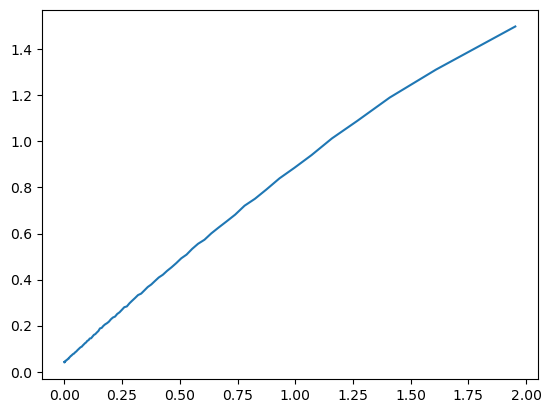

In [4]:
plt.plot(- np.log(1 - np.array(rho) ** 2) / 2, mi.mean(axis=1))
plt.show()

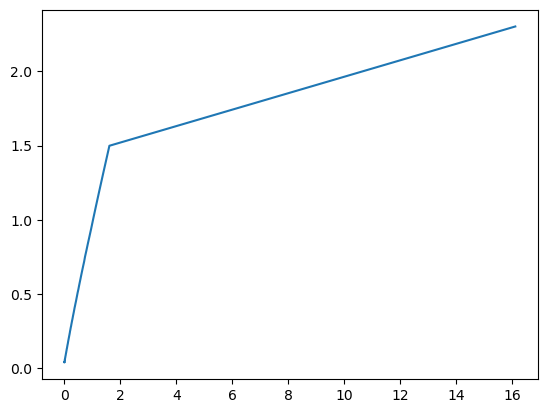

In [5]:
plt.plot(- np.log(1 - np.array(pearson.mean(axis=1)) ** 2) / 2, mi.mean(axis=1))
plt.show()

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

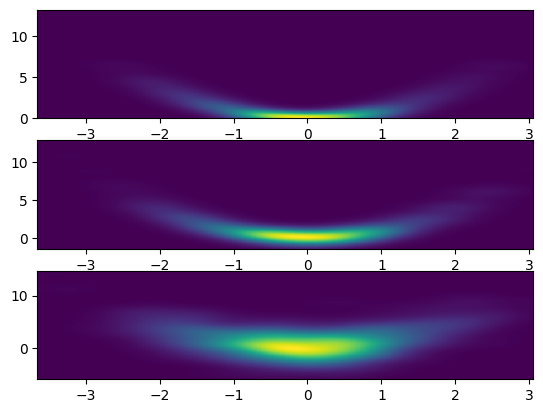

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

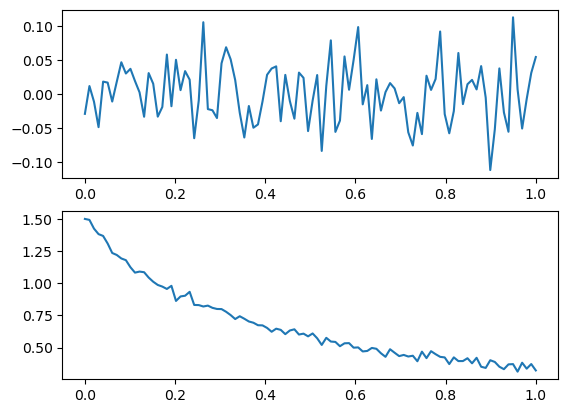

In [6]:
n = 1000
rho = np.linspace(0, 1, 100)

pearson = np.zeros(100)
mi = np.zeros(100)
for i in range(100):
    x = np.random.normal(0, 1, n)
    data_2d = np.array([x, x**2 + np.random.normal(0, rho[i], n)]).T
    data_2d[:,0] = pd.qcut(data_2d[:,0], 10, labels=False)
    data_2d[:,1] = pd.qcut(data_2d[:,1], 10, labels=False)
    pearson[i] = pearsonr(data_2d[:,0], data_2d[:,1])[0]
    mi[i] = mutual_info_score(data_2d[:,0], data_2d[:,1])

# name plots 2 different plots 
fig, axs = plt.subplots(2)
axs[0].plot(rho, pearson)
axs[1].plot(rho, mi)
plt.show()

#### bp 3)

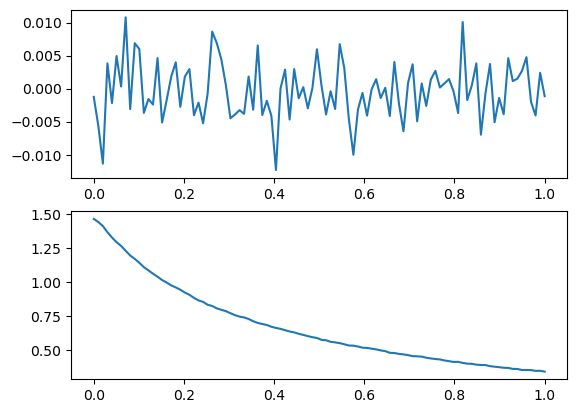

In [7]:
n = 1000
rho = np.linspace(0, 1, 100)
pearson = np.zeros((100, 100))
mi = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        x = np.random.normal(0, 1, n)
        data_2d = np.array([x, x**2 + np.random.normal(0, rho[i], n)]).T
        data_2d[:,0] = pd.qcut(data_2d[:,0], 10, labels=False)
        data_2d[:,1] = pd.qcut(data_2d[:,1], 10, labels=False)
        pearson[i, j] = pearsonr(data_2d[:,0], data_2d[:,1])[0]
        mi[i, j] = mutual_info_score(data_2d[:,0], data_2d[:,1])

# make lineplot by taking average for each rho 
fig, axs = plt.subplots(2)
axs[0].plot(rho, pearson.mean(axis=1))
axs[1].plot(rho, mi.mean(axis=1))
plt.show()

## Task 2

### a)

In [9]:
def asymptotic_independence_tests(X, Y, stats):
    X_d = np.digitize(X, bins=np.linspace(np.min(X), np.max(X), 10))
    Y_d = np.digitize(Y, bins=np.linspace(np.min(Y), np.max(Y), 10)) 

    if stats == "mi": 
        mi = mutual_info_score(X_d, Y_d)
        stat = 2 * len(X) * mi
    else:  
        contingency = np.histogram2d(X, Y, bins=10)[0]
        stat = chi2_contingency(contingency)[0]
        
    df = (len(np.unique(X_d)) - 1) * (len(np.unique(Y_d)) - 1)
    p_value = chi2.sf(stat, df)
    return p_value, stat

### b)

In [10]:
def permutation_tests(X, Y, B=1000):
    mi_b = np.array([])

    Y_d = np.digitize(Y, bins=np.linspace(np.min(Y), np.max(Y), 10))
    X_d_ori = np.digitize(X, bins=np.linspace(np.min(X), np.max(X), 10))
    mi = mutual_info_score(X_d_ori, Y_d)
    
    for _ in range(B):
        X_d = np.random.permutation(X_d_ori)
        mi_per = mutual_info_score(X_d, Y_d)
        mi_b = np.append(mi_b, mi_per)

    p_value = (1 + np.sum(mi < mi_b)) / (1 + B)
    
    return p_value, mi

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [13]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

np.random.seed(517)
X = np.random.normal(0, 1, 1000)
Y = np.random.normal(0, 1, 1000)

pearson = asymptotic_independence_tests(X, Y, stats = "pearson")
mi = asymptotic_independence_tests(X, Y, stats = "mi")
perm = permutation_tests(X, Y, B=100)

print(f"Asymptotic independence tests (pearson): p value = {pearson[0]}, statistic = {pearson[1]}")
print(f"Asymptotic independence tests (mi): p value = {mi[0]}, statistic = {mi[1]}")
print(f"Permutation tests: p value = {perm[0]}, statistic = {perm[1]}")

Asymptotic independence tests (pearson): p value = 0.9339498487110155, statistic = 62.73969745504519
Asymptotic independence tests (mi): p value = 0.9237914179785456, statistic = 63.545510898559534
Permutation tests: p value = 0.7623762376237624, statistic = 0.031772755449279766


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [14]:
# independent r.v. - ideally we will reject the null hypothesis

data = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), 1000)
X, Y = data[:,0], data[:,1]

pearson = asymptotic_independence_tests(X, Y, stats = "pearson")
mi = asymptotic_independence_tests(X, Y, stats = "mi")
perm = permutation_tests(X, Y, B=100)

print(f"Asymptotic independence tests (pearson): p value = {pearson[0]}, statistic = {pearson[1]}")
print(f"Asymptotic independence tests (mi): p value = {mi[0]}, statistic = {mi[1]}")
print(f"Permutation tests: p value = {perm[0]}, statistic = {perm[1]}")

Asymptotic independence tests (pearson): p value = 8.027753162119084e-41, statistic = 383.3707500071427
Asymptotic independence tests (mi): p value = 8.683943296007797e-26, statistic = 293.08460621396455
Permutation tests: p value = 0.009900990099009901, statistic = 0.14654230310698227
